In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

Dataset: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

* Loading, manipulating and plotting data using numpy and matplotlib
* The hypothesis and cost functions for linear regression
* Gradient descent with one variable and multiple variables
* Feature scaling and normalization
* Vectorization and the normal equation
* Linear regression and gradient descent in Tensorflow

# Loading and Plotting Data

In [7]:
data = pd.read_csv("./data.csv")
temps = data['atemp'].values  # normalized high temperature in C
rentals = data['cnt'].values / 1000  # total number of bike rentals scaled by a factor of a thousand

Text(0,0.5,'Bike Rentals in 1000s')

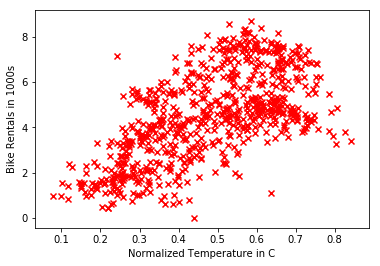

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')

# Simple Linear Regression

* Hypothesis = Linear Regression
* Cost Function = MSE
* $\theta$ = vector of feature weights
* $x^{(i)}$ = ith training example
* $y^{(i)}$ = example's y value

$$\begin{align} h_\theta(x) & = \theta_0 + \theta_1x_1 \\ J(\theta) & = \frac{1}{2m}\sum\limits_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 \end{align}$$

In [11]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [12]:
theta = np.zeros(2) # initial values for thetas
X = np.column_stack((np.ones(len(temps)), temps)) # stack column of ones for bias
y = rentals
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [ 0.  0.]
cost: 12.0184064412


Minimize the cost using the gradient descent algorithm:

$$\begin{align}
\theta_0 := \theta_0 - \alpha\frac{\partial}{\partial\theta_0} J(\theta_0,\theta_1) \\
\theta_1 := \theta_1 - \alpha\frac{\partial}{\partial\theta_1} J(\theta_0,\theta_1) 
\end{align}$$
The update rule each iteration:

$$\begin{align}
\theta_0 := \theta_0 - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \\
\theta_1 := \theta_1 - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_1^{(i)} \\
\end{align}$$

In [13]:
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

    return theta

In [14]:
iterations = 5000
alpha = 0.1

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

theta: [ 0.94588081  7.50171673]
cost: 1.12758692584


# Visualization

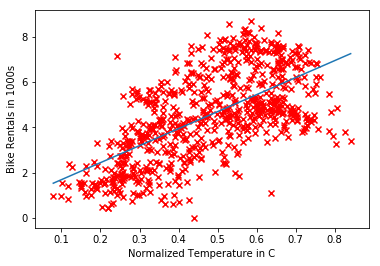

In [15]:
plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')
samples = np.linspace(min(temps), max(temps))
plt.plot(samples, theta[0] + theta[1] * samples)

 how gradient descent approaches a global minimum

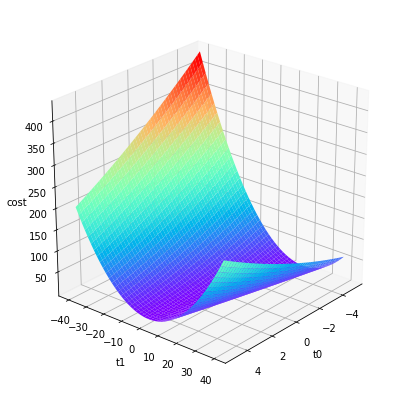

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Xs, Ys = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-40, 40, 50))
Zs = np.array([compute_cost(X, y, [t0, t1]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel(r't0')
ax.set_ylabel(r't1')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)

countour plot

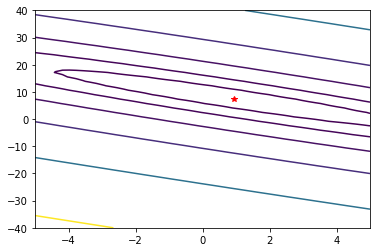

In [17]:
ax = plt.figure().gca()
ax.plot(theta[0], theta[1], 'r*')
plt.contour(Xs, Ys, Zs, np.logspace(-3, 3, 15))

# Multiple Linear Regression

1. 1 feature (temperature) => 3 features (temperature, humidity, windspeed)
2. Feature scaling and normalization
    * prevent features from disproportionately influencing the results
    * gradient descent converges more quickly
    
**Feature scaling** : subtract the mean and divide the result by the standard deviation of all values for that feature

$$
z = \frac{x - \mu}{\sigma}
$$

In [18]:
def feature_normalize(X):
    n_features = X.shape[1]
    means = np.array([np.mean(X[:,i]) for i in range(n_features)])
    stddevs = np.array([np.std(X[:,i]) for i in range(n_features)])
    normalized = (X - means) / stddevs
    
    return normalized

In [19]:
X = data.as_matrix(columns=['atemp', 'hum', 'windspeed'])
X = feature_normalize(X)
X = np.column_stack((np.ones(len(X)), X))

y = data['cnt'].values / 1000

gradient descent for any number of features:

$$
\theta_j := \theta_j - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In [20]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient

    return theta

In [21]:
theta = gradient_descent_multi(X, y, theta, alpha, iterations)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost', cost)

theta: [ 4.50434884  1.22203893 -0.45083331 -0.34166068]
cost 1.00587092471


**Normal equation** - analytical solution for <= 10 000 examples
* not iterative
* computationally more expensive

$$
\theta = (X^TX)^{-1}X^Ty
$$

In [22]:
from numpy.linalg import inv

def normal_eq(X, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

theta = normal_eq(X, y)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [ 4.50434884  1.22203893 -0.45083331 -0.34166068]
cost: 1.00587092471


# Linear Regression in Tensorflow

Tensorflow:
    * the algorithm => computational graph
    * built-in gradient descent optimizer
    * explicit bias (not θ0)

In [24]:
X = data.as_matrix(columns=['atemp', 'hum', 'windspeed'])
X = feature_normalize(X)
y = data['cnt'].values / 1000
y = y.reshape((-1, 1))

m = X.shape[0]
n = X.shape[1]

examples = tf.placeholder(tf.float32, [m,n])
labels = tf.placeholder(tf.float32, [m,1])
weights = tf.Variable(tf.zeros([n,1], dtype=np.float32), name='weight')
bias = tf.Variable(tf.zeros([1], dtype=np.float32), name='bias')

define hypothesis, cost function and optimizer:

In [25]:
hypothesis = tf.add(tf.matmul(examples, weights), bias)
cost = tf.reduce_sum(tf.square(hypothesis - y)) / (2 * m)
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

start up a session, run the optimizer iteratively:

In [26]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(1, iterations):
        sess.run(optimizer, feed_dict={
            examples: X,
            labels: y
        }) 
        
    print('bias:', sess.run(bias))
    print('weights:', sess.run(weights))

bias: [ 4.50434685]
weights: [[ 1.22203839]
 [-0.45083305]
 [-0.34166056]]


# L1 and L2 Regularization methods

Suppose we are trying to model the relationship between $y_{i}$ and $x_{i}$ using a high degree polynomial (10 degrees for example). If we minimize $Error(\beta)$ above (square loss) to estimate our model, then this model is prone to overfitting if the higher order terms are assigned large weights to caputure noise in the data. The simple idea behind regularization is that we add a penalty function to the standard square loss function so that learning algorithm doesn't easily assign large weights to the higher order covariates. The $L1$ regularized error function is $$J_{L1}(\theta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\theta)-y_{i})^2 + \frac{\lambda}{2} \sum_{i=1}^{k}|\theta{i}|,$$ and the $L2$ regualirized error function is $$J_{L2}(\theta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\theta)-y_{i})^2 + \frac{\lambda}{2} \sum_{i=1}^{k}\theta_{i}^{2},$$ where $\lambda$ is the regularization parameter. Note that using the $L1$ loss function is known as lasso regression, and using the $L2$ loss function is known as ridge regression. The regularized terms $\frac{\lambda}{2} \sum_{i=1}^{k}|\theta_{i}|,\frac{\lambda}{2} \sum_{i=1}^{k}\theta{i}^{2}$ in the $L1$ and $L2$ loss functions respectively shrink the parameters $(\theta_{1}, \ldots, \theta_{k})$ towards 0 (notice the intercept $\beta_{0}$ is excluded from the regularized term). Suppose the true relationship between $y_{i}$ and $x_{i}$ is quadratic, then regularization should prevent our 10 degree polynomial from overfitting as now the higher degree terms will likely be assigned lower weight than if we had used the standard sqaure cost $J(\theta).$ The tuning parameter $\lambda$ is usually determined by using a methadology known as cross validation. We will leave cross validation for a future notebook, for now we will just set $\lambda = 5.$

# Simple Linear Regression - Regularized

In [48]:
def gradient_descent_regularized(X, y, alpha, iterations, _lambda=0.1):
    theta = np.zeros(2)
    m = len(y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - ((alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1]) + (_lambda / m) * np.sum(np.square(theta)))
        theta = np.array([t0, t1])

    return theta

In [49]:
iterations = 5000
alpha = 0.1

temps_stacked = np.column_stack((np.ones(len(temps)), temps)) 

theta_reg = gradient_descent_regularized(temps_stacked, rentals, alpha, iterations)
cost_reg = compute_cost(temps_stacked, rentals, theta_reg)

print("theta reg:", theta_reg)
print('cost reg:', compute_cost(temps_stacked, rentals, theta_reg))

theta reg: [ 1.81361864  5.67240978]
cost reg: 1.17196542615


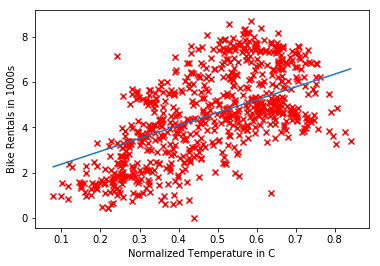

In [50]:
plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')
samples = np.linspace(min(temps), max(temps))
plt.plot(samples, theta_reg[0] + theta_reg[1] * samples)

# Regularization in TensorFlow

In [35]:
reg_strength = 0.01

#cost_reg_1   = reg_strength * tf.nn.l2_loss(W)   # reg 1
cost_reg_2   = cost + reg_strength * tf.reduce_sum(weights**2) # reg 2
optimizer_reg = tf.train.GradientDescentOptimizer(alpha).minimize(cost_reg_2)

In [36]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(1, iterations):
        sess.run(optimizer_reg, feed_dict={
            examples: X,
            labels: y
        }) 
        
    print('bias:', sess.run(bias))
    print('weights:', sess.run(weights))

bias: [ 4.50434685]
weights: [[ 1.1972084]
 [-0.4372355]
 [-0.3361192]]
